In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input  # Правильный импорт слоя Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Посмотрим кол-во и среднее метрик по обоим классам

In [6]:
grouped_stats = df.groupby('Potability').agg(
    [
        'count',
        'mean',
        'median',
        'min',
        'max',
        lambda x: x.isna().sum(),
        lambda x: (x == 0).sum()
    ]
)
grouped_stats.columns = ['_'.join(col) for col in grouped_stats.columns]
grouped_stats.rename(columns={
    'ph_<lambda_0>': 'ph_missing',
    'ph_<lambda_1>': 'ph_zeros',
    'Hardness_<lambda_0>': 'Hardness_missing',
    'Hardness_<lambda_1>': 'Hardness_zeros',
    'Solids_<lambda_0>': 'Solids_missing',
    'Solids_<lambda_1>': 'Solids_zeros',
    'Chloramines_<lambda_0>': 'Chloramines_missing',
    'Chloramines_<lambda_1>': 'Chloramines_zeros',
    'Sulfate_<lambda_0>': 'Sulfate_missing',
    'Sulfate_<lambda_1>': 'Sulfate_zeros',
    'Conductivity_<lambda_0>': 'Conductivity_missing',
    'Conductivity_<lambda_1>': 'Conductivity_zeros',
    'Organic_carbon_<lambda_0>': 'Organic_carbon_missing',
    'Organic_carbon_<lambda_1>': 'Organic_carbon_zeros',
    'Trihalomethanes_<lambda_0>': 'Trihalomethanes_missing',
    'Trihalomethanes_<lambda_1>': 'Trihalomethanes_zeros',
    'Turbidity_<lambda_0>': 'Turbidity_missing',
    'Turbidity_<lambda_1>': 'Turbidity_zeros'
}, inplace=True)
grouped_stats.T

Potability,0,1
ph_count,1684.000000,1101.000000
ph_mean,7.085378,7.073783
ph_median,7.035456,7.036752
ph_min,0.000000,0.227499
ph_max,14.000000,13.175402
...,...,...
Turbidity_median,3.948076,3.958576
Turbidity_min,1.450000,1.492207
Turbidity_max,6.739000,6.494249
Turbidity_missing,0.000000,0.000000


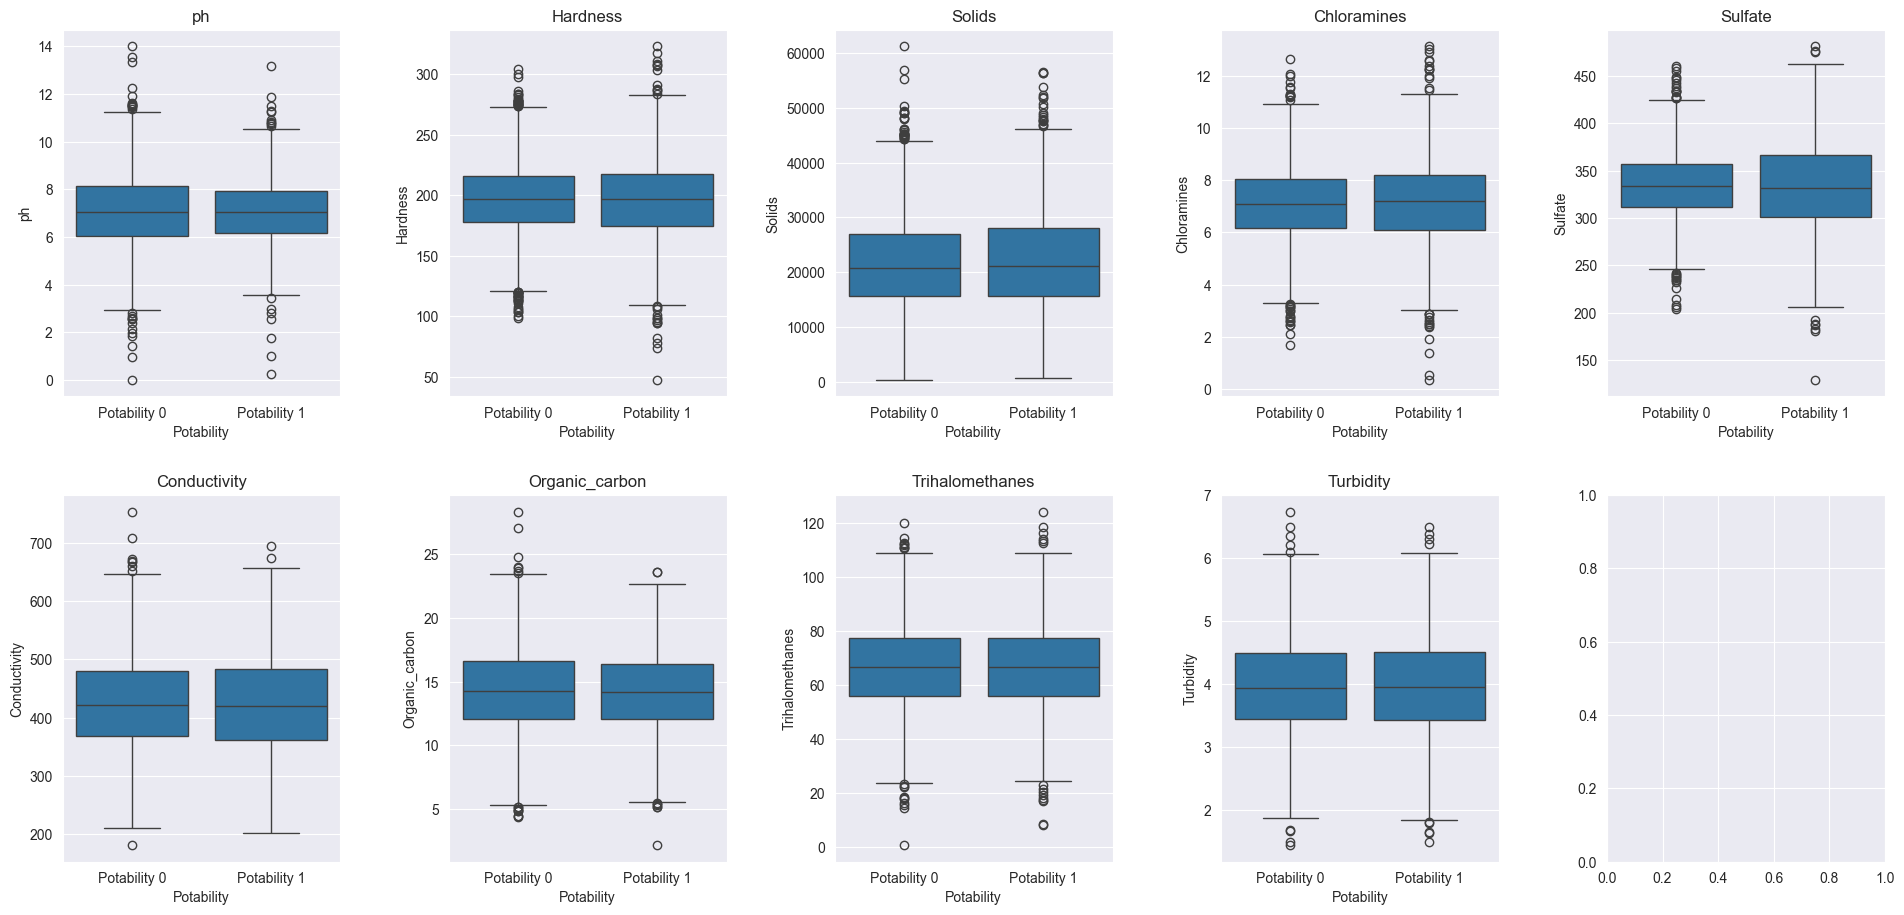

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = df.columns[:-1]  # Exclude the 'Potability' column
potability_values = df['Potability'].unique()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.tight_layout(pad=5.0)

for metric, ax in zip(metrics, axes.flatten()):
    sns.boxplot(data=df, x='Potability', y=metric, ax=ax)
    ax.set_title(metric)
    ax.set_xticks(range(len(potability_values)))  # Explicitly set the tick positions
    ax.set_xticklabels([f'Potability {val}' for val in potability_values])

plt.show()

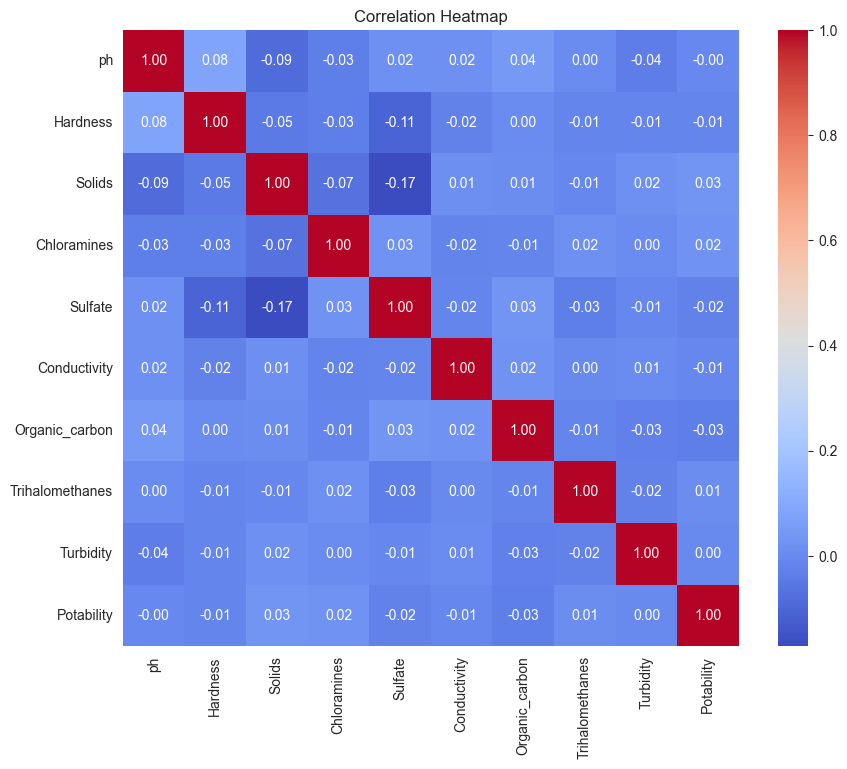

In [10]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()